# Fashion MNIST Exercise Notebook

> This notebook contains the Solution version of the Fashion MNIST problem

In this notebook, we are trying to make an image classification model to classify images of fashion products from 10 categories. 

This dataset is one of the most famous datasets out there, and it has it's own <a href="https://en.wikipedia.org/wiki/MNIST_database">wikipedia page</a>. 

This dataset is contains 70,000 images of fashion products.

**Your goal is to get 80% accuracy or higher**

![image.png](https://ruslanmv.com/assets/images/posts/2020-11-15-DCGAN-Fashion/DCGAN_Learner_Notebook_5_0.png)

**Note:** The below cell is the setup cell for this exercise, it is going to download the data, extract them, and assign them to a variable.

Therefore, the cell might take while to load

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Downlaod the data
import urllib.request
url = 'https://github.com/Sayed-Husain/Introduction-to-Machine-Learning-Workshop/raw/main/Data/fashion.zip'
filename = 'fashion.zip'
urllib.request.urlretrieve(url, filename)

# Unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("fashion.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [2]:
# Read the train dataset
train_dataset = pd.read_csv("fashion-mnist_train.csv")

# Read the test dataset
test_dataset = pd.read_csv("fashion-mnist_test.csv")

# To confirm that the dataset is what we are expecting, let's check the length of the datasets
len(train_dataset), len(test_dataset)

The length of the train dataset = 60000
The length of the test dataset = 10000


## Understand the dataset

In order to be able to pass the datasets to the model, we first need to understand the data that we have.

In [3]:
# View the head of the DataFrame
train_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each row in the training dataset has 785 columns, if we assumed that the `label` column is the target, then the other 784 columns refer to the pixel values

In [4]:
28*28

784

As our image size is (28,28), the dataset we have have represented the image's pixels with the values of 784 columns.

To confirm, let's try and view the first image of the dataset.

## View the first image

In [5]:
# Create the X and y variables 
X_train = train_dataset.drop("label", axis=1)
y_train = train_dataset["label"]

# Do the same thing for the test dataset
X_test = test_dataset.drop("label", axis=1)
y_test = test_dataset["label"]

Great, as we have the X_train (the images) and y_train (what class do they represent) data, let's try and view the first image

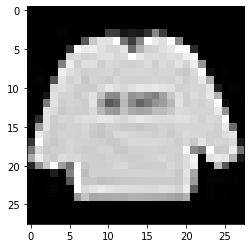

In [6]:
# Make the `first_image` variable and pass it the image pixel values
first_image = X_train.values[0]

# Return it to it's original shape
first_image = first_image.reshape(28,28)

# From the matplotlib library, let's use the imshow function (stands for image show) to view the first image
plt.imshow(first_image, cmap="gray");

## Make the model
As this is a classification problem, we are going to use the `RandomForestClassifier()` model from sklearn

In [7]:
# Import RandomForestClassifier model from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Make the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Check the accuracy of the model
model.score(X_test, y_test)

0.8845